In [1]:
# Loading the dataset function
from dataset_functions import *
from PCA_functions import *


In [2]:
# Loading Dataset
dataset_path = r"PCBDataset/"
HSI, HSI_general_masks, HSI_monoseg_masks, RGB, RGB_monoseg_masks, RGB_general_masks, PCB_Masks = read_dataset(dataset_path)


100%|██████████| 53/53 [00:03<00:00, 13.73it/s]

Dataset loading is complete.


In [3]:
# Clipping values outside [0, 1] range
HSI = clipping_neg_pos(HSI)

100%|██████████| 53/53 [00:39<00:00,  1.34it/s]


Clipping data is complete. No more negative values.


In [4]:
# Discarding the first 10 bands (noisy)
HSI = slicing(HSI,10)
HSI[0].shape

100%|██████████| 53/53 [00:09<00:00,  5.84it/s]


Skipping first 10 bands
The HS cubes have 214 channels, the first 10 are sliced out.


(272, 499, 214)

In [5]:
# HSI manual dataset splitting: 33% training - 5% Validation - 56% Testing
training = [1,3,8,11,17,22,23,24,25,32,34,44,45,47,49,50,52,53]
validation = [18, 37, 42] 
testing = [2, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 26, 27, 28, 29, 30, 31, 33, 36, 38, 39, 40, 41, 43, 46, 48, 51]

# Data Generation

In [6]:
# Creating & Augmenting the training HS cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Training_cubes, Training_masks = Generate_Training_data(training, HSI, HSI_general_masks)
len(Training_cubes), Training_cubes[0].shape, len(Training_masks), np.min(Training_cubes[0]), np.max(Training_cubes[0])

(126, (272, 499, 214), 126, 0.0, 1.0)

In [7]:
# Validation cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Validation_cubes, Validation_masks = Generate_data(validation, HSI, HSI_general_masks)
len(Validation_cubes), Validation_cubes[0].shape, np.min(Validation_cubes[0]), np.max(Validation_cubes[0])

(3, (370, 560, 214), 0.0, 1.0)

In [8]:
# Test cubes

# For working with general ground truth change 'HSI_monoseg_masks' to 'HSI_general_masks' !!
Testing_cubes, Testing_masks = Generate_data(testing, HSI, HSI_general_masks)
len(Testing_cubes), Testing_cubes[0].shape, len(Testing_masks), np.min(Testing_cubes[0]), np.max(Testing_cubes[0])

(30, (1100, 1024, 214), 30, 0.0, 1.0)

# PCA

0 126
1 126
2 126
3 126
4 126
5 126
6 126
7 126
8 126
9 126
10 126
11 126
12 126
13 126
14 126
15 126
16 126
17 126
18 126
19 126
20 126
21 126
22 126
23 126
24 126
25 126
26 126
27 126
28 126
29 126
30 126
31 126
32 126
33 126
34 126
35 126
36 126
37 126
38 126
39 126
40 126
41 126
42 126
43 126
44 126
45 126
46 126
47 126
48 126
49 126
50 126
51 126
52 126
53 126
54 126
55 126
56 126
57 126
58 126
59 126
60 126
61 126
62 126
63 126
64 126
65 126
66 126
67 126
68 126
69 126
70 126
71 126
72 126
73 126
74 126
75 126
76 126
77 126
78 126
79 126
80 126
81 126
82 126
83 126
84 126
85 126
86 126
87 126
88 126
89 126
90 126
91 126
92 126
93 126
94 126
95 126
96 126
97 126
98 126
99 126
100 126
101 126
102 126
103 126
104 126
105 126
106 126
107 126
108 126
109 126
110 126
111 126
112 126
113 126
114 126
115 126
116 126
117 126
118 126
119 126
120 126
121 126
122 126
123 126
124 126
125 126


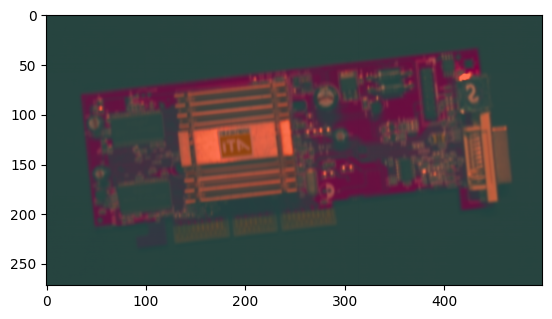

126 (272, 499, 3)


In [10]:
# Training PCA

# Create an empty list to store the PCA-transformed training data
Training_PCA = []

# Iterate over the training cubes
for i, img in enumerate(Training_cubes):
    # # Print the current iteration number and the total number of training cubes
    print(i, len(Training_cubes))

    # Apply PCA to the current cube and append the transformed data to the list
    Training_PCA.append(PCA2(img, 3))

# Visualize the first PCA-transformed cube
plt.imshow(Training_PCA[0][:, :, :3])  # Display the first three channels of the transformed cube
plt.show()

# Display the number of cubes and the shape of the transformed data
print(len(Training_PCA), Training_PCA[0].shape)

In [11]:
# Saving training PCA 

for i, (cube, mask) in enumerate(zip(Training_PCA, Training_masks)):
    """
    Iterate over the PCA-transformed training cubes and their corresponding masks, saving them to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed training cube
        mask (numpy.ndarray): Corresponding training mask
    """
    
    # Define saving path
    saving_path =  "PCBDataset/pca/train/"     # e.g.,: /home/PCBvision/PCA/train/
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"

    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the training mask
    filename = f"{saving_path}{i}.npy"

    # Save the training mask to a NumPy file
    np.save(filename, mask)

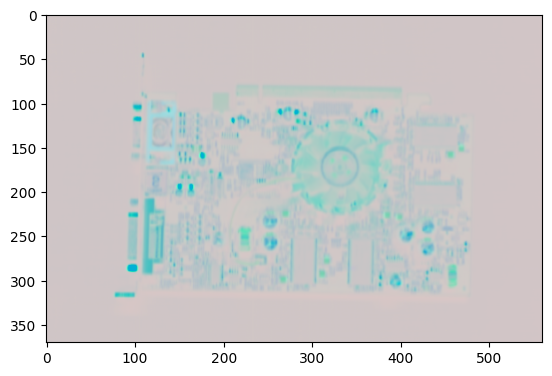

3 (370, 560, 3)


In [12]:
# Validation PCA

# Create an empty list to store the PCA-transformed validation data
Validation_PCA = []  

# Iterate over the validation cubes
for i, val_img in enumerate(Validation_cubes):  

    # Apply PCA to the current cube and append the transformed data to the list
    Validation_PCA.append(PCA2(val_img, 3))  

# Display the first three channels of the transformed validation cube
plt.imshow(Validation_PCA[0][:, :, :3])  
plt.show()

# Print the length and shape of the PCA-transformed validation data
print(len(Validation_PCA), Validation_PCA[0].shape)  

In [13]:
# Saving validation PCA 

for i, (cube, mask) in enumerate(zip(Validation_PCA, Validation_masks)):
    """
    Save the PCA-transformed validation data and their corresponding masks to separate files

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed validation cube
        mask (numpy.ndarray): Corresponding validation mask
    """
    # Define saving path
    saving_path =  "PCBDataset/pca/validation/"     # e.g.,: /home/PCBvision/PCA/validation/
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"

    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the validation mask
    filename = f"{saving_path}{i}.npy"

    # Save the validation mask to a NumPy file
    np.save(filename, mask)

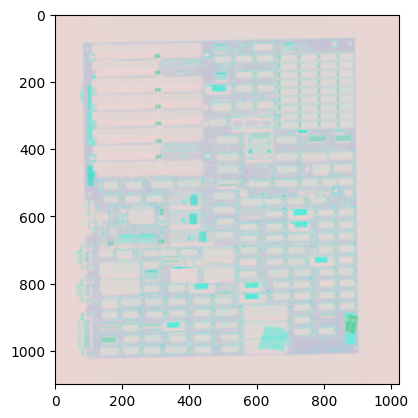

30 (1100, 1024, 3)


In [14]:
# Test PCA

# Create an empty list to store the PCA-transformed testing data
Testing_PCA = []  

# Iterate over the testing cubes
for i, test_img in enumerate(Testing_cubes):  

    # Apply PCA to the current cube and append the transformed data to the list
    Testing_PCA.append(PCA2(test_img, 3))  

# Display the first three channels of the transformed testing cube
plt.imshow(Testing_PCA[0][:, :, :3])  
plt.show()

# Print the length and shape of the PCA-transformed testing data
print(len(Testing_PCA), Testing_PCA[0].shape)

In [15]:
# Saving testing PCA 

for i, (cube, mask) in enumerate(zip(Testing_PCA, Testing_masks)):
    """
    Save the PCA-transformed testing data and their corresponding masks to separate files.

    Parameters:
        i (int): Iteration index
        cube (numpy.ndarray): PCA-transformed testing cube
        mask (numpy.ndarray): Corresponding testing mask
    """
    # Define saving path
    saving_path =  "PCBDataset/pca/test/"
    
    # Construct the filename for the PCA-transformed cube
    filename = f"{saving_path}{i}.hdr"
    
    # Save the PCA-transformed cube to an ENVI header file
    envi.save_image(filename, cube, dtype=np.float32, ext=None, force=True)

    # Construct the filename for the testing mask
    filename = f"{saving_path}{i}.npy"

    # Save the testing mask to a NumPy file
    np.save(filename, mask)